In [1]:
#Loading Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing Libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import hex_to_rgb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [6]:
#Loading Datasets:
movies = pd.read_csv('/content/drive/MyDrive/tmdb_5000_movies.csv',na_filter=False)
credits = pd.read_csv('/content/drive/MyDrive/tmdb_5000_credits.csv')
movies_hindi = pd.read_csv('/content/drive/MyDrive/bollywood_full_1950-2019.csv')
ratings = pd.read_csv('/content/drive/MyDrive/ratings_small.csv')

##Data Analysis:

In [ ]:
movies.shape

(4803, 20)

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [ ]:
movies.describe()

,budget,id,popularity,revenue,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,10.000000,13752.000000


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              4803 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4803 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4803 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4803 non-null   object 
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
movies.duplicated().sum()

0

No duplicated raws 

In [ ]:
movies['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

each genre has a unique id

In [ ]:
movies['keywords'][0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

each keyword has also unique id

In [ ]:
movies['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [ ]:
movies['spoken_languages'][0]

'[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]'

In [ ]:
movies['production_companies'][0]	

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

production companies and their id

In [ ]:
movies['production_countries'][0]

'[{"iso_3166_1": "US", "name": "United States of America"}, {"iso_3166_1": "GB", "name": "United Kingdom"}]'

In [ ]:
credits.shape

(4803, 4)

In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
credits['cast'][0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

in cast columns, we have cast id for each cast, their character name, their gender, their original name and order in which they have been mentioned

In [ ]:
credits['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In crew column, we have their unique id, department name, gender, their job, name.

In [7]:
movies = movies.merge(credits,left_on='id', right_on='movie_id')

merging the dataset on the basis of movie_id

In [ ]:
movies.columns

Index(['budget', 'genre 1', 'genre 2', 'genre 3', 'genre 4', 'genre 5',
       'genre 6', 'genre 7', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'weighted_average',
       'normalized_weight_average', 'normalized_popularity', 'score'],
      dtype='object')

columns we have after merging both the datasets.

## Plots and Graphs

In [ ]:
def create_genres(movie):
    genres = eval(movie['genres'])
    for i, gen in enumerate(genres):
        movie.loc[f'genre {i+1}'] = gen['name']
    return movie

movies = movies.apply(lambda x: create_genres(x), axis=1)

In [ ]:
genre_list = ['genre 1', 'genre 2', 'genre 3', 'genre 4', 'genre 5', 'genre 6', 'genre 7']
genres_sum = movies[genre_list].melt().dropna()['value']
print(genres_sum.shape)

Text(0.5, 0, 'Genre')

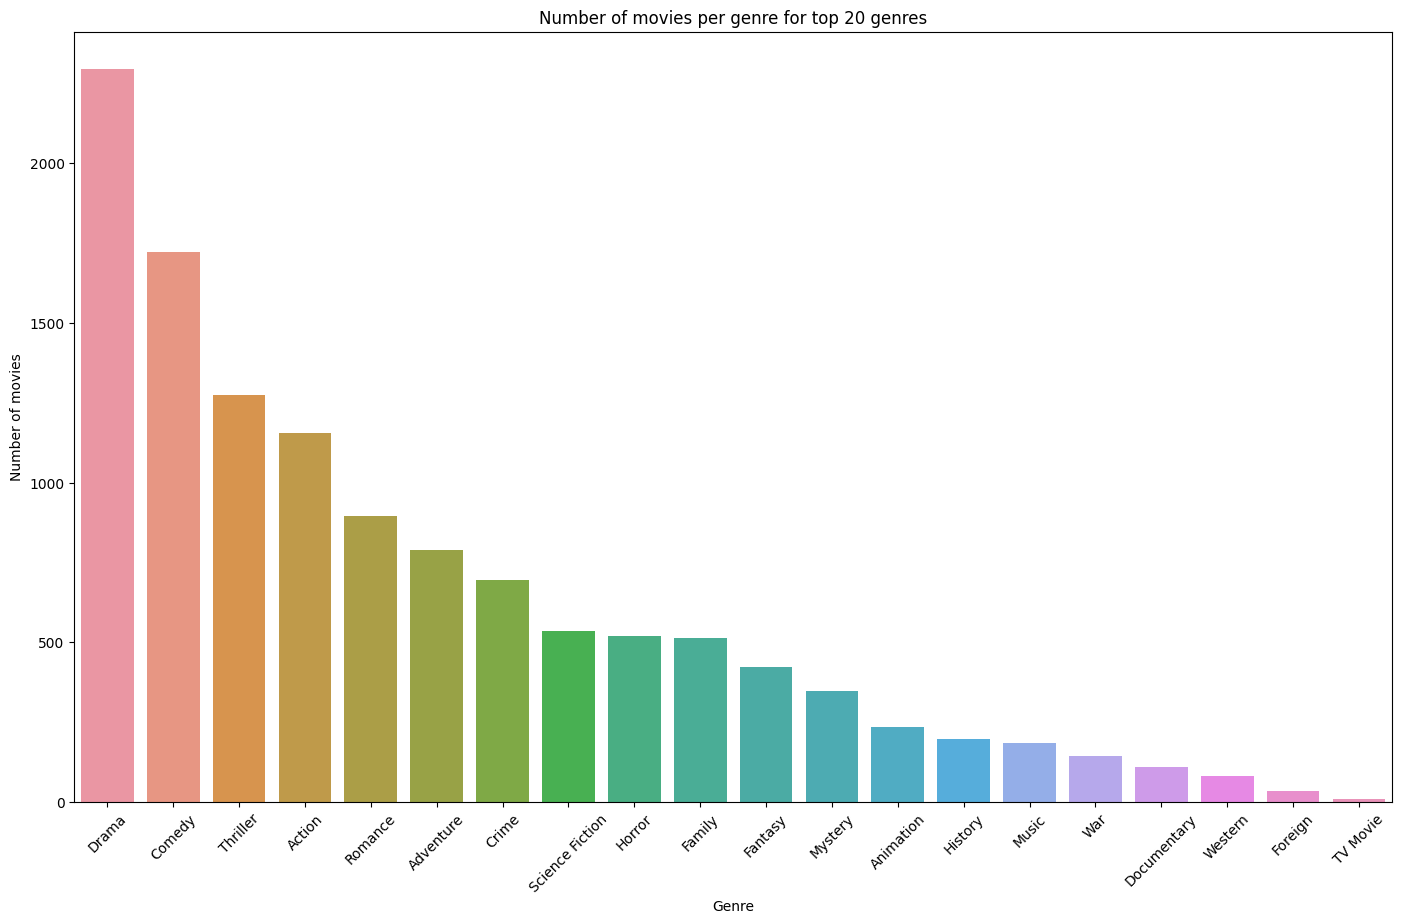

In [ ]:
fig, axs = plt.subplots(figsize=(17,10))
a = sns.countplot(x=genres_sum,order=genres_sum.value_counts().index)
axs.tick_params(axis='x', rotation=45)
axs.set_title('Number of movies per genre for top 20 genres')
axs.set_ylabel('Number of movies')
axs.set_xlabel('Genre')

In [ ]:
#Original Language Unique Values:
print("Original Language:", movies['original_language'].value_counts())

Original Language: en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64


We have maximun number of movies with english as original language.

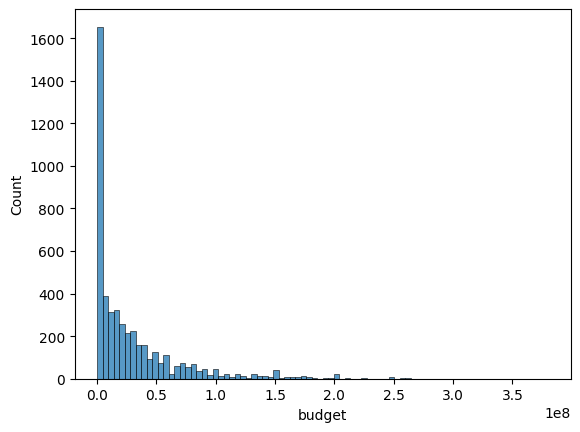

In [ ]:
#Distribution of Numerical Values:
sns.histplot(movies['budget'], kde=False)
plt.show()

Very few movies have very high budget.

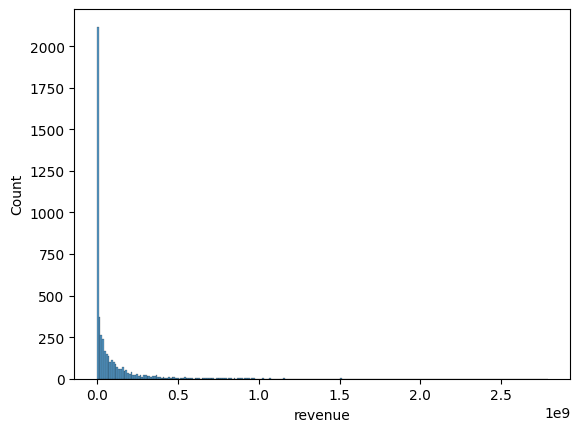

In [ ]:
sns.histplot(movies['revenue'], kde=False)
plt.show()

Similar to budget, revenue is having very high for only few movies.

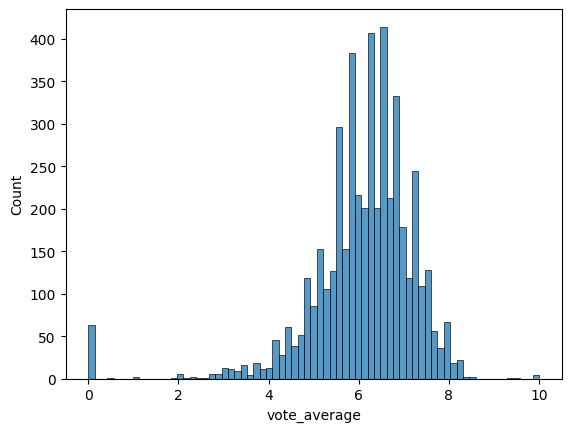

In [ ]:
sns.histplot(movies['vote_average'], kde=False)
plt.show()

Only less than 50 movies are having vote less than 1 also, and even less movies have 10 vote.

<ipython-input-30-fbf4156b9927>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(movies.corr(), annot=True, cmap='coolwarm')


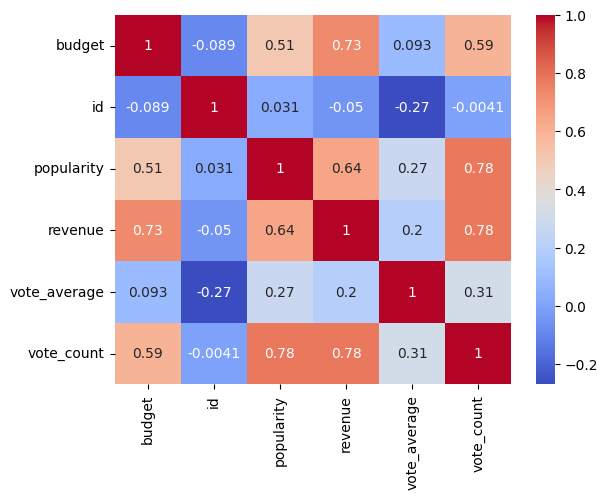

In [ ]:
#Correlation between Numerical Values:
sns.heatmap(movies.corr(), annot=True, cmap='coolwarm')
plt.show()

It is differently how 1 column is related other one.

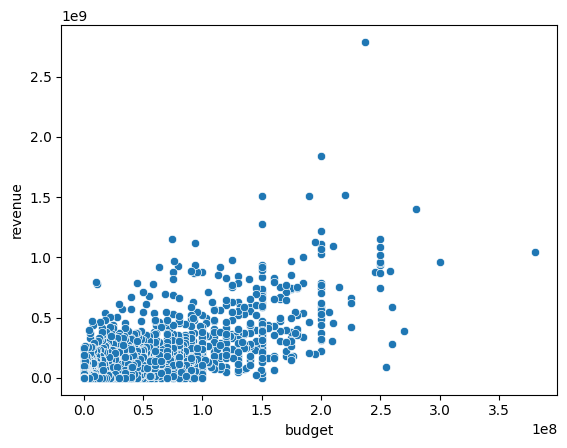

In [ ]:
#Relationship between Numerical Values:
sns.scatterplot(x='budget', y= 'revenue', data=movies)
plt.show()

Mostly Revenue and Budget is highly correlated, in less budget.

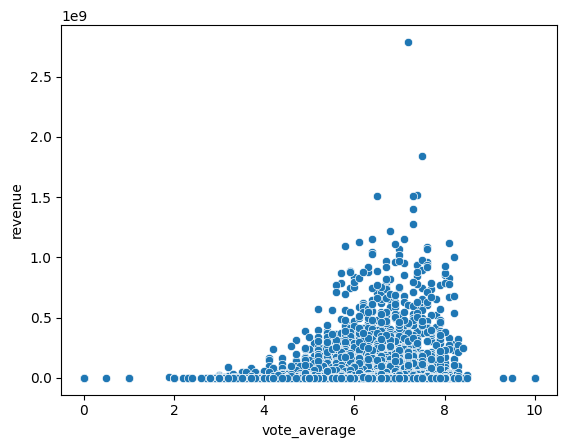

In [ ]:
sns.scatterplot(x='vote_average', y= 'revenue', data=movies)
plt.show()

Here, the Vote_average is average for less amount of revenue.

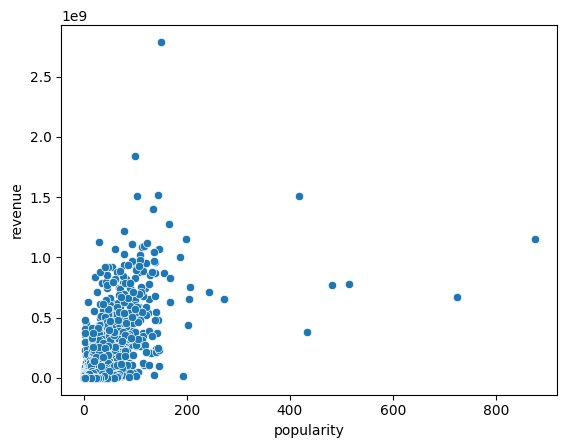

In [ ]:
sns.scatterplot(x='popularity', y= 'revenue', data=movies)
plt.show()

But in the case of popularity and revenue is kind of opposite.

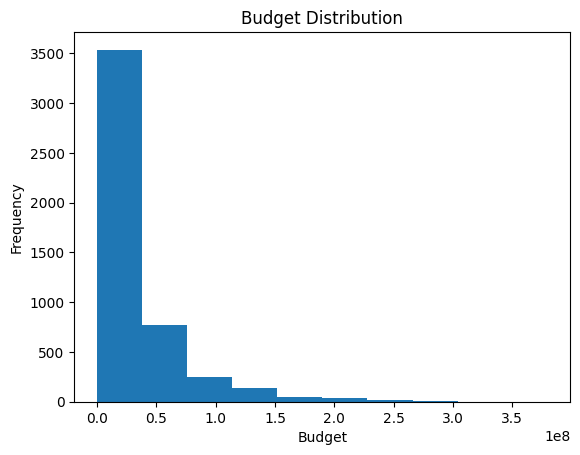

In [ ]:
#Budget Distribution:
plt.hist(movies['budget'])
plt.title("Budget Distribution")
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

It is showing that few movies are released having less budget.

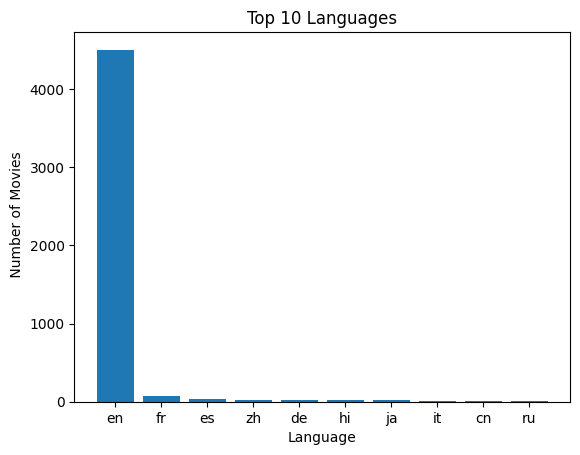

In [ ]:
#Bar Chart of top 10 Languages:
top_languages = movies['original_language'].value_counts().head(10)
plt.bar(top_languages.index, top_languages.values)
plt.title('Top 10 Languages')
plt.xlabel('Language')
plt.ylabel(' Number of Movies')
plt.show()

English language is having highest no.of movies.

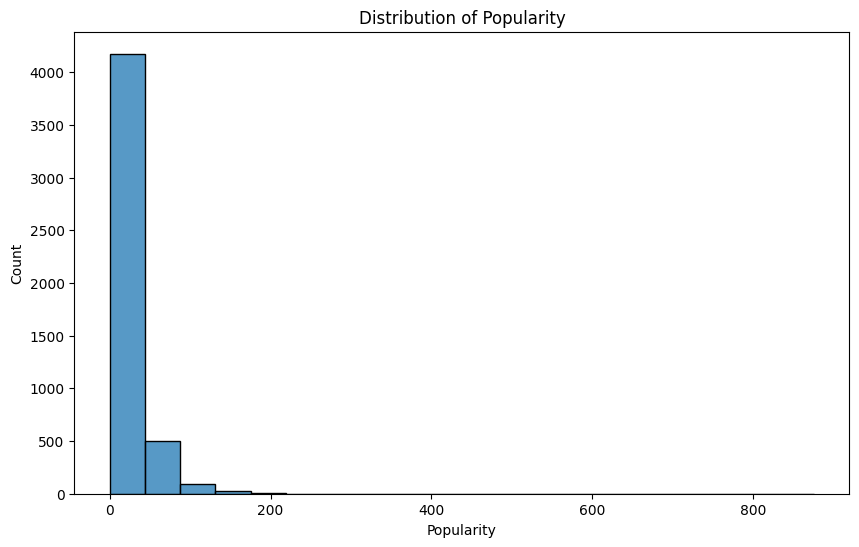

In [ ]:
#Histogram for popularity Column:
plt.figure(figsize=(10,6))
sns.histplot(data= movies, x='popularity', bins=20)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.show()

More number of movies are popular in the Dataset.

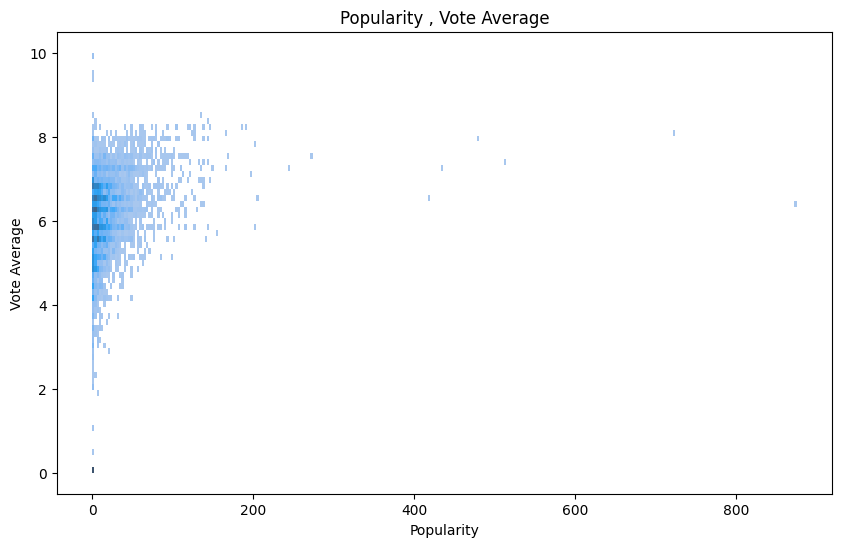

In [ ]:
#Distribution of popularity and Vote_Average:
plt.figure(figsize=(10,6))
sns.histplot(data=movies, x='popularity', y='vote_average')
plt.title('Popularity , Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

It is showing that more votes are average are more popular.

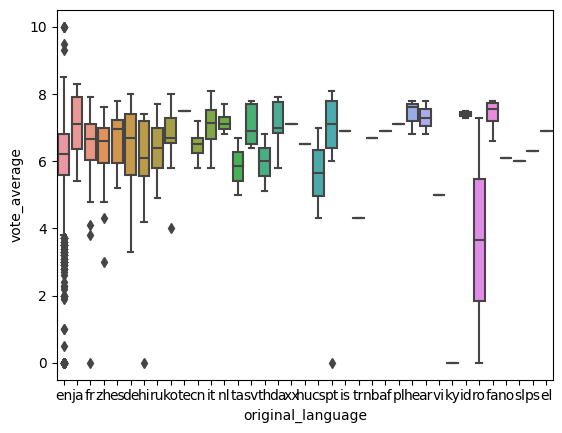

In [ ]:
#Relation between Original Language and Vote Average:
sns.boxplot(data=movies, x='original_language',y='vote_average')
plt.show()

In [ ]:
#Top 10 movies with Highest Revenue:
movies.sort_values('revenue', ascending=False)[['original_title','revenue']][:10]

,original_title,revenue
0,Avatar,2787965087
25,Titanic,1845034188
16,The Avengers,1519557910
28,Jurassic World,1513528810
44,Furious 7,1506249360
7,Avengers: Age of Ultron,1405403694
124,Frozen,1274219009
31,Iron Man 3,1215439994
546,Minions,1156730962
26,Captain America: Civil War,1153304495


## Popularity based RS

weighted_average = ((Rv)+(Cm))/(v+m)

In [ ]:
# Calculate all the components based on the above formula
v=movies['vote_count']
R=movies['vote_average']
C=movies['vote_average'].mean()
m=movies['vote_count'].quantile(0.70)

In [ ]:
movies['weighted_average']=((R*v)+ (C*m))/(v+m)

In [ ]:
movie_sorted_ranking=movies.sort_values('weighted_average',ascending=False)
movie_sorted_ranking[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity']].head(20)

,original_title,vote_count,vote_average,weighted_average,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927
809,Forrest Gump,7927,8.2,8.056059,138.133331
1818,Schindler's List,4329,8.3,8.038748,104.469351
3865,Whiplash,4254,8.3,8.034695,192.528841
96,Inception,13752,8.1,8.018611,167.583710
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830


Sorted movies based on the weighted average counted above

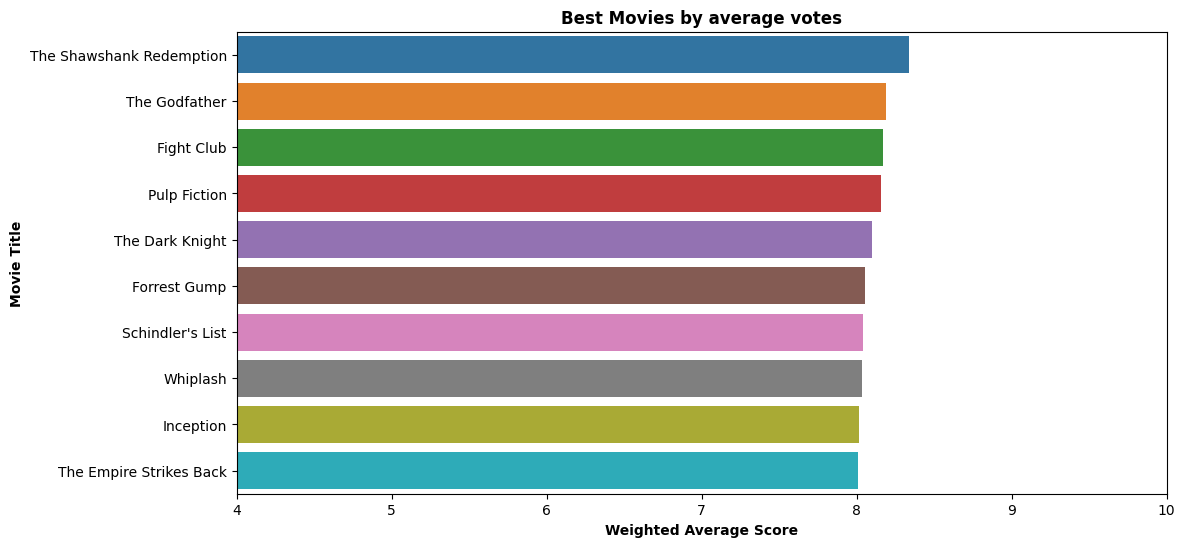

In [ ]:
weight_average=movie_sorted_ranking.sort_values('weighted_average',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted_average'].head(10), y=weight_average['original_title'].head(10), data=weight_average)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
# plt.savefig('best_movies.png')

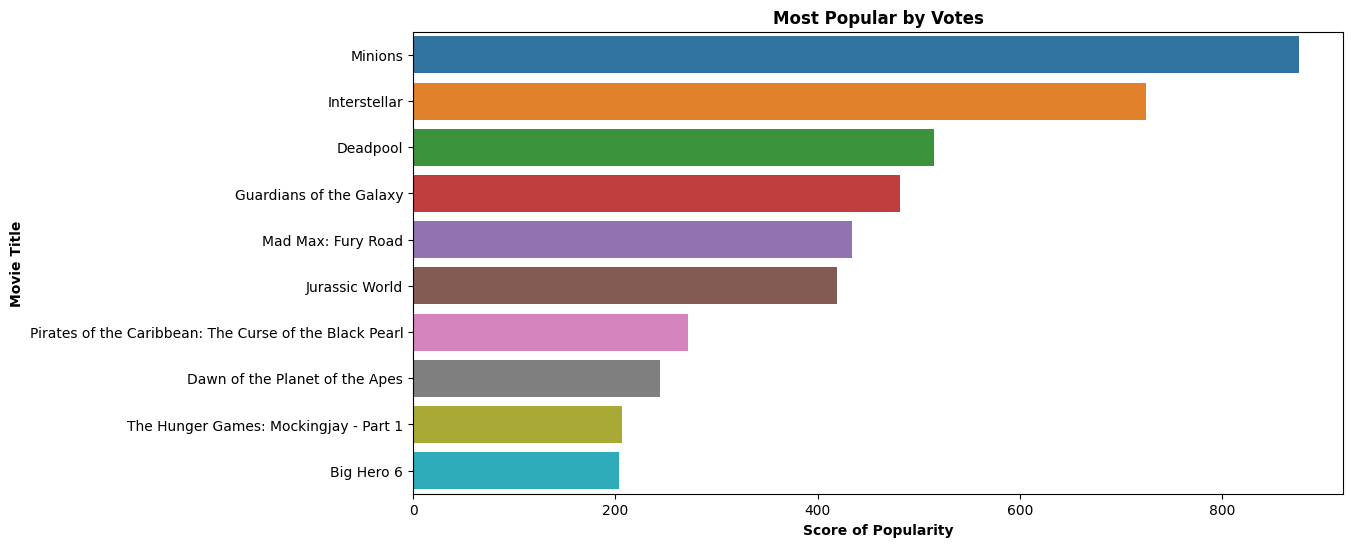

In [ ]:
popularity=movie_sorted_ranking.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
# plt.savefig('best_popular_movies.png')
#df[cat] = le.fit_transform(df[cat].astype(str))

In [ ]:
popularity.head()

,budget,genre 1,genre 2,genre 3,genre 4,genre 5,genre 6,genre 7,genres,homepage,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,weighted_average
546,74000000,Family,Animation,Adventure,Comedy,NaN,NaN,NaN,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 16, ""...",http://www.minionsmovie.com/,...,2015-06-17,1156730962,91,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4571,6.365286
95,165000000,Adventure,Drama,Science Fiction,NaN,NaN,NaN,NaN,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",http://www.interstellarmovie.net/,...,2014-11-05,675120017,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,8.1,10867,7.998100
788,58000000,Action,Adventure,Comedy,NaN,NaN,NaN,NaN,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.foxmovies.com/movies/deadpool,...,2016-02-09,783112979,108,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Witness the beginning of a happy ending,Deadpool,7.4,10995,7.334360
94,170000000,Action,Science Fiction,Adventure,NaN,NaN,NaN,NaN,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",http://marvel.com/guardians,...,2014-07-30,773328629,121,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All heroes start somewhere.,Guardians of the Galaxy,7.9,9742,7.798252
127,150000000,Action,Adventure,Science Fiction,Thriller,NaN,NaN,NaN,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.madmaxmovie.com/,...,2015-05-13,378858340,120,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What a Lovely Day.,Mad Max: Fury Road,7.2,9427,7.135687


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_scaled_df=scaling.fit_transform(movies[['weighted_average','popularity']])
movie_normalized_df=pd.DataFrame(movie_scaled_df,columns=['weighted_average','popularity'])
movie_normalized_df.head()

,weighted_average,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [ ]:
movies[['normalized_weight_average','normalized_popularity']]= movie_normalized_df

In [ ]:
movies.head()

,budget,genre 1,genre 2,genre 3,genre 4,genre 5,genre 6,genre 7,genres,homepage,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,weighted_average,normalized_weight_average,normalized_popularity
0,237000000,Action,Adventure,Fantasy,Science Fiction,NaN,NaN,NaN,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,...,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,7.148013,0.674339,0.171815
1,300000000,Adventure,Fantasy,Action,NaN,NaN,NaN,NaN,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,...,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,6.807627,0.581403,0.158846
2,245000000,Action,Adventure,Crime,NaN,NaN,NaN,NaN,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,...,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,6.276075,0.436273,0.122635
3,250000000,Action,Crime,Drama,Thriller,NaN,NaN,NaN,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,...,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,7.509565,0.773054,0.128272
4,260000000,Action,Adventure,Science Fiction,NaN,NaN,NaN,NaN,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,...,132,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,6.098319,0.387739,0.050169


In [ ]:
movies['score'] = movies['normalized_weight_average'] * 0.5 + movies['normalized_popularity'] * 0.5
movies_scored_df = movies.sort_values(['score'], ascending=False)
movies_scored_df[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(20)

,original_title,normalized_weight_average,normalized_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


Here, score is calculated as average of weighted average and popularity score

Text(0, 0.5, 'Movie Title')

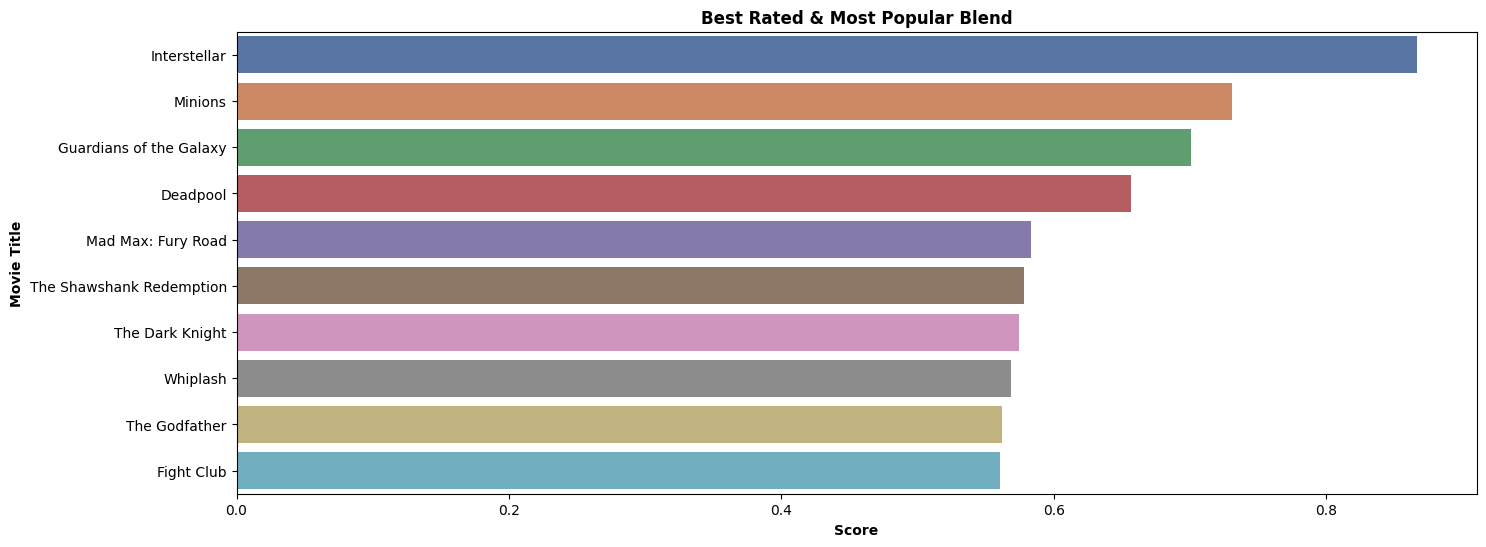

In [ ]:
scored_df = movies.sort_values('score', ascending=False)

plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored_df['score'].head(10), y=scored_df['original_title'].head(10), data=scored_df, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')

# plt.savefig('scored_movies.png')

This graph shows popularity based on the score calculated above


## Preprocessing/Cleaning for OtherRecommendation System:

In [ ]:
df = movies[['genres','movie_id','original_title','overview','cast']]

In [ ]:
features = ['cast', 'genres']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)

<ipython-input-80-f811668e43fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].apply(literal_eval)


Making cast and genres column simple

In [ ]:
def get_list(meta_data):
    if isinstance(meta_data, list):
        names = [col['name'] for col in meta_data]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

keeping only first 3 genres for further process

In [ ]:
features = ['cast','genres']
for feature in features:
    df[feature] = df[feature].apply(get_list)

<ipython-input-82-4de582a46ce4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].apply(get_list)


In [ ]:
df.head(2)

,genres,movie_id,original_title,overview,cast
0,"[Action, Adventure, Fantasy]",19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]"
1,"[Adventure, Fantasy, Action]",285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]"


In [ ]:
df2 = movies_hindi.drop(columns=['title_x', 'tagline', 'poster_path', 
                                        'wiki_link','title_y','is_adult', 'year_of_release',
                                       'tagline', 'imdb_rating', 'runtime',
                                       'imdb_votes', 'story',
                                       'wins_nominations', 'release_date'])

In [ ]:
df2.rename(columns = {'actors':'cast', 'imdb_id':'movie_id'}, inplace = True)

df2['genres'] = df2['genres'].str.split('|')

df2['cast'] = df2['cast'].str.split('|')

df2 = df2.drop([697])

df2.head()

,movie_id,original_title,genres,summary,cast
0,tt8291224,Uri: The Surgical Strike,"[Action, Drama, War]",Indian army special forces execute a covert op...,"[Vicky Kaushal, Paresh Rawal, Mohit Raina, Yam..."
1,tt9472208,Battalion 609,[War],The story of Battalion 609 revolves around a c...,"[Vicky Ahuja, Shoaib Ibrahim, Shrikant Kamat, ..."
2,tt6986710,The Accidental Prime Minister,"[Biography, Drama]",Explores Manmohan Singh's tenure as the Prime ...,"[Anupam Kher, Akshaye Khanna, Aahana Kumra, At..."
3,tt8108208,Why Cheat India,"[Crime, Drama]",The movie focuses on existing malpractices in ...,"[Emraan Hashmi, Shreya Dhanwanthary, Snighdade..."
4,tt6028796,Evening Shadows,[Drama],Under the 'Evening Shadows' truth often plays...,"[Mona Ambegaonkar, Ananth Narayan Mahadevan, D..."


In [ ]:
def clean_data(actors):
    if isinstance(actors, list):
        return actors[:3]

Keeping first three top actors for the further process

In [ ]:
features = ['cast']
for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

df2.head()

,movie_id,original_title,genres,summary,cast
0,tt8291224,Uri: The Surgical Strike,"[Action, Drama, War]",Indian army special forces execute a covert op...,"[Vicky Kaushal, Paresh Rawal, Mohit Raina]"
1,tt9472208,Battalion 609,[War],The story of Battalion 609 revolves around a c...,"[Vicky Ahuja, Shoaib Ibrahim, Shrikant Kamat]"
2,tt6986710,The Accidental Prime Minister,"[Biography, Drama]",Explores Manmohan Singh's tenure as the Prime ...,"[Anupam Kher, Akshaye Khanna, Aahana Kumra]"
3,tt8108208,Why Cheat India,"[Crime, Drama]",The movie focuses on existing malpractices in ...,"[Emraan Hashmi, Shreya Dhanwanthary, Snighdade..."
4,tt6028796,Evening Shadows,[Drama],Under the 'Evening Shadows' truth often plays...,"[Mona Ambegaonkar, Ananth Narayan Mahadevan, D..."


In [ ]:
df2['overview'] = df2['summary']

In [ ]:
df2 = df2.drop(['summary'],axis=1)

In [ ]:
final_df = df.append(df2, ignore_index=True, sort=True)

<ipython-input-91-2d0d9d984a77>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = df.append(df2, ignore_index=True, sort=True)


Concatanating hindi and english movie dataset together

In [ ]:
final_df.sample(10)

,cast,genres,movie_id,original_title,overview
3010,"[Dane Cook, Jessica Simpson, Dax Shepard]","[Comedy, Romance]",9794,Employee of the Month,When he hears that the new female employee dig...
4619,"[Giovanni Ribisi, Natasha Gregson Wagner, Dona...",[Drama],118452,"First Love, Last Rites",Joey and Sissel are two misfits spending most ...
3747,"[Burt Lancaster, Tony Curtis, Gina Lollobrigida]",[Drama],40494,Trapeze,"A pair of men try to perform the dangerous ""tr..."
5607,"[Vinay Pathak, Riya Sen, Jagrat Desai]","[Comedy, Drama, Romance]",tt1696191,Tere Mere Phere,An irate groom-to-be abducts a recently marrie...
8175,"[Raj Kapoor, Rajendra Kumar, Shailendra Singh]","[Comedy, Mystery]",tt0361515,Do Jasoos,Two bumbling middle-aged private detectives ...
4928,"[Utkarsh Sharma, Ishita Chauhan, Mithun Chakra...","[Action, Thriller]",tt7722258,Genius,An orphan with a brilliant mind joins RAW an...
7646,"[Jeetendra, Kamal Haasan, Zeenat Aman]","[Action, Drama]",tt0260579,Yeh Desh,Chandramohan Azad (Jeetendra) is an employee a...
2593,"[André Benjamin, Paula Patton, Terrence Howard]","[Crime, Drama, Music]",13816,Idlewild,A musical set in the Prohibition-era American ...
3689,"[Rachael Leigh Cook, Luke Kirby, Keith Carradine]","[Action, Comedy, Drama]",10914,All Hat,An ex-con returns to his rural Ontario roots a...
3378,"[Greg Kinnear, Willem Dafoe, Rita Wilson]","[Drama, Crime]",14112,Auto Focus,"A successful TV star during the 1960s, former ..."


This is the final dataframe to work for all other recommendation system.



In [ ]:
final_df.shape

(9132, 5)

In [ ]:
# final_df.to_csv('final_df.csv')

##Content Based Recommendation System:

In [ ]:
import scipy.sparse as sp
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_data():
        movie_data = final_df              ##pd.read_csv('dataset/movie_data.csv.zip')
        movie_data['original_title'] = movie_data['original_title'].str.lower()
        return movie_data
        #making all the names of movies lower case so, in case if the user types any movie name that can be processed easily

def combine_data(data):
        data_recommend = data.drop(columns=['movie_id', 'original_title','overview'])
        data_recommend['combine'] = data_recommend[data_recommend.columns[0:2]].apply(
                                                                        lambda x: ','.join(x.dropna().astype(str)),axis=1)
        
        data_recommend = data_recommend.drop(columns=[ 'cast','genres'])
        return data_recommend
        # Combining the caste and genre together
        
def transform_data(data_combine, data_plot):
        count = CountVectorizer(stop_words='english')
        count_matrix = count.fit_transform(data_combine['combine'])

        tfidf = TfidfVectorizer(stop_words='english')
        tfidf_matrix = tfidf.fit_transform(data_plot['overview'].values.astype('U'))

        combine_sparse = sp.hstack([count_matrix, tfidf_matrix], format='csr')
        cosine_sim = cosine_similarity(combine_sparse, combine_sparse)
        # finding similarity based on the overview and genre
        return cosine_sim


def recommend_movies(title, data, combine, transform):
        indices = pd.Series(data.index, index = data['original_title'])
        index = indices[title]



        sim_scores = list(enumerate(transform[index]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = sim_scores[1:11]


        movie_indices = [i[0] for i in sim_scores]

        movie_id = data['movie_id'].iloc[movie_indices]
        movie_title = data['original_title'].iloc[movie_indices]
        movie_genres = data['genres'].iloc[movie_indices]

        recommendation_data = pd.DataFrame(columns=['Movie_Id','Name', 'Genres'])

        recommendation_data['Movie_Id'] = movie_id
        recommendation_data['Name'] = movie_title
        recommendation_data['Genres'] = movie_genres

        return recommendation_data

def results(movie_name):
        movie_name = movie_name.lower()

        find_movie = get_data()
        combine_result = combine_data(find_movie)
        transform_result = transform_data(combine_result,find_movie)
        #calling all the functions 
        if movie_name not in find_movie['original_title'].unique():
                return 'Movie not in Database'

        else:
                recommendations = recommend_movies(movie_name, find_movie, combine_result, transform_result)
                return recommendations.to_dict('records')

In [ ]:
res  = results("Avatar")

In [ ]:
result = pd.DataFrame(res)

In [ ]:
result

,Movie_Id,Name,Genres
0,18823,clash of the titans,"[Adventure, Fantasy, Action]"
1,9092,snow white: a tale of terror,"[Fantasy, Horror]"
2,19585,g-force,"[Fantasy, Action, Adventure]"
3,17130,crossroads,"[Action, Adventure, Comedy]"
4,tt0182637,uchû keiji gyaban,"[Action, Adventure, Fantasy]"
5,54138,star trek into darkness,"[Action, Adventure, Science Fiction]"
6,34813,the losers,"[Action, Adventure, Crime]"
7,118340,guardians of the galaxy,"[Action, Science Fiction, Adventure]"
8,57165,wrath of the titans,[Adventure]
9,tt0047796,abe hayat,"[Action, Adventure, Fantasy]"


In [ ]:
result['Name']

0             clash of the titans
1    snow white: a tale of terror
2                         g-force
3                      crossroads
4               uchû keiji gyaban
5         star trek into darkness
6                      the losers
7         guardians of the galaxy
8             wrath of the titans
9                       abe hayat
Name: Name, dtype: object

## User-User Collabrative Filtering Recommendation System:

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

We will use cosine similarity

In [ ]:
ratings.head(30)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [ ]:
ratings = ratings.drop(['timestamp'],axis=1)
ratings = ratings.merge(movies,left_on='movieId',right_on='movie_id')

In [ ]:
ratings.head()

,userId,movieId,rating,genres,keywords,original_language,original_title,overview,popularity,spoken_languages,vote_average,vote_count,movie_id,cast
0,1,2105,4.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...","[{""id"": 3687, ""name"": ""graduation""}, {""id"": 61...",en,American Pie,"At a high-school party, four friends find that...",60.767168,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.4,2296,2105,"[{""cast_id"": 16, ""character"": ""Jim Levenstein""..."
1,4,2105,4.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...","[{""id"": 3687, ""name"": ""graduation""}, {""id"": 61...",en,American Pie,"At a high-school party, four friends find that...",60.767168,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.4,2296,2105,"[{""cast_id"": 16, ""character"": ""Jim Levenstein""..."
2,15,2105,4.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...","[{""id"": 3687, ""name"": ""graduation""}, {""id"": 61...",en,American Pie,"At a high-school party, four friends find that...",60.767168,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.4,2296,2105,"[{""cast_id"": 16, ""character"": ""Jim Levenstein""..."
3,30,2105,2.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...","[{""id"": 3687, ""name"": ""graduation""}, {""id"": 61...",en,American Pie,"At a high-school party, four friends find that...",60.767168,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.4,2296,2105,"[{""cast_id"": 16, ""character"": ""Jim Levenstein""..."
4,34,2105,4.0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...","[{""id"": 3687, ""name"": ""graduation""}, {""id"": 61...",en,American Pie,"At a high-school party, four friends find that...",60.767168,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.4,2296,2105,"[{""cast_id"": 16, ""character"": ""Jim Levenstein""..."


In [ ]:
ratings.original_language.value_counts()

en    16967
fr      326
de      321
ru      310
hi      277
es      168
zh       68
ja       39
it       17
da       17
ro       17
ko       16
sv        9
nl        9
pt        6
th        4
Name: original_language, dtype: int64

In [ ]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'genres', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'spoken_languages', 'vote_average', 'vote_count', 'movie_id', 'cast'],
      dtype='object')

In [ ]:
# ratings.to_csv('ratings.csv')

In [ ]:
user_item_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')

user item matrix based on movie id and user id

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
user_item_matrix[np.isnan(user_item_matrix)] = 0 #making all the nan values as 0
# Calculate the similarity between users using Cosine
user_similarity = cosine_similarity(user_item_matrix)
user_similarity

NameError: ignored

## User- User

In [ ]:
target_user_id = 50 
similar_users_indices = np.argsort(user_similarity[target_user_id])[::-1][:10]
similar_users_ratings = user_item_matrix.iloc[similar_users_indices]
similar_users_ratings

movieId,5,11,12,13,14,16,18,19,20,22,...,64499,69640,74510,77866,89492,98369,103731,114635,115210,116977
userId,,,,,,,,,,,,,,,,,,,,,
51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


getting similar user to the target user 50

In [ ]:
target_user_ratings = user_item_matrix.iloc[target_user_id]
predicted_ratings = similar_users_ratings.apply(lambda x: np.average(x.dropna(), weights=user_similarity[target_user_id][similar_users_indices]))

# Generate a list of movie recommendations for the target user based on the predicted ratings
recommended_movie_ids = predicted_ratings.sort_values(ascending=False)[:10].index.tolist()

recommended_movies = ratings[ratings['movieId'].isin(recommended_movie_ids)]
# print(recommended_recipes)
print(recommended_movies.original_title.unique())

['Un long dimanche de fiançailles' 'License to Wed'
 'The Thomas Crown Affair' 'The Bourne Supremacy' 'Men in Black II'
 'Barry Lyndon' 'High Noon' 'The Greatest Story Ever Told' 'Hairspray'
 'Crank']


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

# Calculate the similarity between users using Pearson correlation
user_similarity = 1 - pairwise_distances(user_item_matrix, metric='correlation')

target_user_id = 40
similar_users_indices = np.argsort(user_similarity[target_user_id])[::-1][:10]
similar_users_ratings = user_item_matrix.iloc[similar_users_indices]

# Predict the rating that the target user would give to a particular recipe based on the ratings of similar users
target_user_ratings = user_item_matrix.iloc[target_user_id]
predicted_ratings = similar_users_ratings.apply(lambda x: np.average(x.dropna(), weights=user_similarity[target_user_id][similar_users_indices]))

# Generate a list of recipe recommendations for the target user based on the predicted ratings
recommended_movie_ids = predicted_ratings.sort_values(ascending=False)[:10].index.tolist()

# Print the recommended recipes
recommended_movies = ratings[ratings['movieId'].isin(recommended_movie_ids)]
result = pd.DataFrame(recommended_movies)
result.original_title.unique()

array(['American Pie', 'Back to the Future Part II',
       'A Nightmare on Elm Street', 'The Conversation', 'Jurassic Park',
       'Rain Man', 'Blood Diamond', 'Dawn of the Dead', 'Barry Lyndon',
       'Persepolis'], dtype=object)

Same using pearson correlation

In [ ]:
# user_item_matrix.to_csv('user_item_matrix.csv')

### Item-Item

In [ ]:
# Calculate the similarity between users using Cosine
# movie_similarity = cosine_similarity(user_item_matrix.T)

# # Select the most similar movies to the target movie
# target_movie_id = 50
def coll(target_movie_id):
  # user_item_matrix = pd.read_csv('/content/user_item_matrix.csv')
  movie_similarity = cosine_similarity(user_item_matrix.T)
  similar_movie_indices = np.argsort(movie_similarity[target_movie_id])[::-1][:10]
  similar_movie_ratings = user_item_matrix.T.iloc[similar_movie_indices]

  # Predict the rating that the target user would give to a particular movie based on the ratings of similar movies
  target_movie_ratings = user_item_matrix.iloc[target_user_id]
  predicted_ratings_movie = similar_movie_ratings.apply(lambda x: np.average(x.dropna(), weights=movie_similarity[target_movie_id][similar_movie_indices]))

  # Generate a list of movies recommendations for the target user based on the predicted ratings
  recommended_movie_ids_movie = predicted_ratings_movie.sort_values(ascending=False)[:10].index.tolist()

  recommended_movies_movie = ratings[ratings['movieId'].isin(recommended_movie_ids_movie)]

  return pd.DataFrame(recommended_movies_movie).original_title.unique()

Recommending similar movies to the movie id =50

In [ ]:
coll(100)

array(['The Fisher King', 'King Kong',
       'Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan'],
      dtype=object)

In [ ]:
matrix = user_item_matrix.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)), axis=1)
user_item_matrix = matrix.fillna(0)

In [ ]:
# similarity = cosine_similarity(matrix)

In [ ]:
# # user_item_matrix = train.pivot(index='userId', columns='movieId', values='rating')
# user_similarity = cosine_similarity(train_ratings, dense_output=False)

# Define a function to get the top N recommendations for a user using user-user collaborative filtering
def get_user_user_recommendations(user, N):
    user_ratings = matrix[:, user]
    similar_users = user_item_matrix[user]
    similar_users_indices = np.argsort(similar_users)[::-1][1:]
    recommendations = []
    for i in range(N):
        similar_user = similar_users_indices[i]
        similar_user_ratings = matrix[:, similar_user]
        rated_by_similar_user = np.nonzero(similar_user_ratings)[0]
        not_rated_by_user = np.where(user_ratings == 0)[0]
        movies_to_recommend = np.intersect1d(rated_by_similar_user, not_rated_by_user)
        movie_ratings = similar_user_ratings[movies_to_recommend]
        sorted_ratings_indices = np.argsort(movie_ratings)[::-1]
        sorted_movies = movies_to_recommend[sorted_ratings_indices]
        recommendations.append(sorted_movies[0])
    return recommendations

## KNN

In [10]:
movies = movies[['title_x','overview','popularity','vote_average','vote_count','release_date','keywords','genres','cast','crew']]

In [11]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title_x       4803 non-null   object 
 1   overview      4803 non-null   object 
 2   popularity    4803 non-null   float64
 3   vote_average  4803 non-null   float64
 4   vote_count    4803 non-null   int64  
 5   release_date  4803 non-null   object 
 6   keywords      4803 non-null   object 
 7   genres        4803 non-null   object 
 8   cast          4803 non-null   object 
 9   crew          4803 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 412.8+ KB


In [13]:
def get_uniques(data,col):
    out=set([val.strip().lower() for val in ','.join(data[col].unique()).split(',')])
    try:
        out.remove('')
    except:
        return list(out)
    return list(out)

In [14]:
genres = get_uniques(movies,'genres')

In [20]:
nn_data=movies.copy()
def fill_genre(value,col,categories=genres):
    if col in value.lower() :
        return 1
    else:
        return 0
# Create genre columns
for col in genres:
    nn_data[col]=None
for index in tqdm(nn_data.index):
    for col in genres:
        nn_data.at[index,col]=fill_genre(nn_data.at[index,'genres'],col)
for col in genres:
    nn_data[col]=nn_data.genres.apply(fill_genre,args=(col,))
nn_data.drop(['overview','release_date','genres','title_x'],axis=1,inplace=True)
for col in ['keywords','cast','crew']:
    nn_data[col]=LabelEncoder().fit_transform(nn_data[col])

100%|██████████| 4803/4803 [00:14<00:00, 334.29it/s]


In [22]:
model_knn = NearestNeighbors(metric='cosine',
                             algorithm='auto',
                             n_neighbors=20,
                             n_jobs=-1)
model_knn.fit(nn_data)

NearestNeighbors(metric='cosine', n_jobs=-1, n_neighbors=20)

In [32]:
def recommend_movies(movie,nn_data,orig_data):
    orig_data.reset_index(inplace=True)
    nn_data.reset_index(inplace=True,drop=True)
    movie_index=nn_data[orig_data.title_x==movie].index
    distances, indices = model_knn.kneighbors(np.array(nn_data.iloc[movie_index]).reshape(
    1, -1),n_neighbors=10)
    
    out=orig_data[[
        'title_x', 'vote_average', 'genres', 'popularity'
    ]].iloc[indices[0]]
    out.genres = out.genres.str.replace(',', '<br>')
    # out.crew = out.crew.str.replace(',', '<br>')
    final=out.sort_values(by='popularity',ascending=False)
    colorscale = [[0, '#fad2e1'], [.5, '#fde2e4'], [1, '#fff1e6']]
    fig = ff.create_table(final, colorscale=colorscale, height_constant=70)
    return fig

In [33]:
recommend_movies("Thor",nn_data.copy(),movies.copy())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



In [35]:
recommend_movies("Inception",nn_data.copy(),movies.copy())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but NearestNeighbors was fitted with feature names



# Learning to Rank

In [4]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [5]:
movies.drop_duplicates()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{"

In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the TMDB dataset
#movies = pd.read_csv('tmdb_5000_movies.csv')

# Convert the revenue column to float
movies['revenue'] = pd.to_numeric(movies['revenue'], errors='coerce')

# Drop rows with missing revenue values
movies.dropna(subset=['revenue'], inplace=True)

# Create a binary label for revenue > $100 million
movies['label'] = np.where(movies['revenue'] > 100000000, 1, 0)

# Define the feature columns
features = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    movies[features], movies['label'], test_size=0.2, random_state=42)

# Define the LightGBM dataset objects
train_data = lgb.Dataset(X_train, label=y_train, group=[len(X_train)])
valid_data = lgb.Dataset(X_valid, label=y_valid, group=[len(X_valid)])

# Define the LambdaRank parameters
params = {
    'objective': 'lambdarank',
    'metric': 'ndcg',
    'ndcg_eval_at': 10,
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LambdaRank model
model = lgb.train(params, train_data, valid_sets=[valid_data], num_boost_round=100)

# Use the LambdaRank model to rank a list of movies
movies_to_rank = pd.DataFrame({
    'budget': [30000000, 40000000, 50000000],
    'popularity': [10.0, 20.0, 30.0],
    'runtime': [120, 130, 140],
    'vote_average': [7.0, 8.0, 9.0],
    'vote_count': [500, 1000, 1500]
})
rankings = model.predict(movies_to_rank)

# Print the rankings
print(rankings)


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's ndcg@10: 0.889954
[2]	valid_0's ndcg@10: 1
[3]	valid_0's ndcg@10: 1
[4]	valid_0's ndcg@10: 1
[5]	valid_0's ndcg@10: 1
[6]	valid_0's ndcg@10: 1
[7]	valid_0's ndcg@10: 1
[8]	valid_0's ndcg@10: 1
[9]	valid_0's ndcg@10: 1
[10]	valid_0's ndcg@10: 1
[11]	valid_0's ndcg@10: 1
[12]	valid_0's ndcg@10: 1
[13]	valid_0's ndcg@10: 1
[14]	valid_0's ndcg@10: 1
[15]	valid_0's ndcg@10: 1
[16]	valid_0's ndcg@10: 1
[17]	valid_0's ndcg@10: 1
[18]	valid_0's ndcg@10: 1
[19]	valid_0's ndcg@10: 1
[20]	valid_0's ndcg@10: 1
[21]	valid_0's ndcg@10: 1
[22]	valid_0's ndcg@10: 1
[23]	valid_0's ndcg@10: 1
[24]	valid_0's ndcg@10: 1
[25]	valid_0's ndcg@10: 1
[26]	valid_0's ndcg@10: 1
[27]	valid_0's ndcg@10: 1
[28]	valid_0's ndcg@10: 1
[29]	valid_0's ndcg@10: 1
[30]	valid_0's ndcg@10: 1
[31]	valid_0's ndcg@10: 1
[32]	valid_0's ndcg@10: 1
[33]	

# Nikunj 202211014 :: Collaborative and KNN


---

# Jainisha 202211019 :: Learning to rank and Evaluation



---

# Arjun 202211036 :: EDA and Popularity RS


---

# Prathamesh :: Preprocessing and Content based RS